In [1]:
import numpy as np
import pandas as pd

In [35]:
#Read Excel file
df = pd.read_excel('Matrix_A.xlsx', sheet_name=['Data', 'Filter'], header=None)

In [36]:
#Extract Data and Filter matrices
data_matrix = df['Data'].iloc[:27, :27].values.astype(float)
filter_matrix = df['Filter'].iloc[:3, :3].values.astype(float)

In [9]:
from scipy.signal import convolve2d

In [38]:
#Perform 2D convolution
result = convolve2d(data_matrix, filter_matrix, mode='valid')

In [39]:
#Find the maximum value in the result
max_value = np.max(result)

In [41]:
#Create a binary mask where the pattern is detected
threshold = max_value * 0.99 #Adjust this threshold if needed
pattern_mask = (result >= threshold).astype(int)

In [53]:
#Highlight the detected pattern in the original data
highlighted_data = data_matrix.copy()
for i in range(pattern_mask.shape[0]):
    for j in range(pattern_mask.shape[1]):
        if pattern_mask[i, j] == 1:
            highlighted_data[i:i+3, j:j+3] = 2 #Highlight with value 2

In [47]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Data Matrix with Detected Pattern Highlighted')

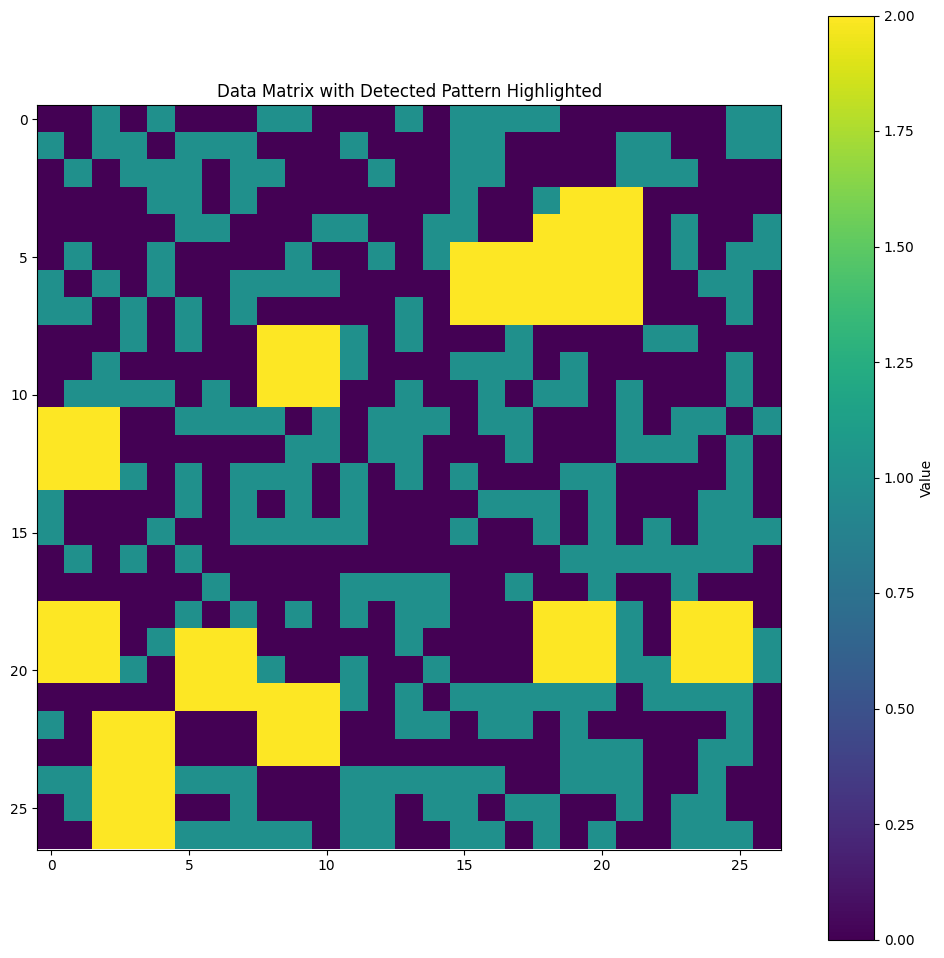

In [54]:
#Plot the highlighted data
plt.figure(figsize=(12, 12))
plt.imshow(highlighted_data, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Data Matrix with Detected Pattern Highlighted')